# Famous Datasets

There are a number of datasets that any data scientist will be familiar with. We're going to use several today to practice data visualization.

* [Iris Dataset](http://archive.ics.uci.edu/ml/datasets/Iris) This data set was collected by the famous statistician R. Fisher in the 1930s. First read about the data set and its features.
* [Abalone Dataset](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all) Various measurements of a type of snail
* [Boston Housing](https://archive.ics.uci.edu/ml/datasets/Housing) Housing prices alone with various supplemental data, such as local crime rates
* [Motor Trend Cars](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
* [Salary Data](https://archive.ics.uci.edu/ml/datasets/Adult)

Seaborn also includes some [additional datasets](https://github.com/mwaskom/seaborn-data).


In [9]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

## First let's try a some function plotting.

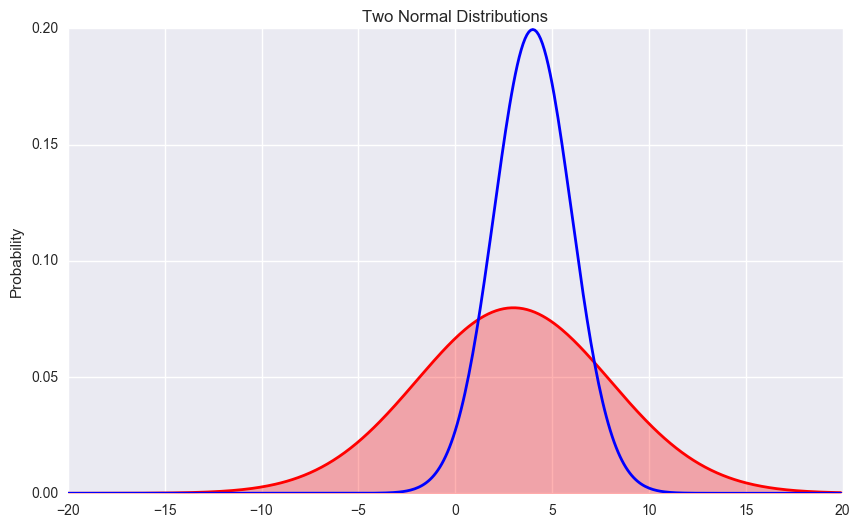

In [4]:
# Plot two normal distributions
domain = np.arange(-20, 20, 0.1)
values = stats.norm(3, 5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='r', alpha=0.3)
values = stats.norm(4, 2).pdf(domain)
plt.plot(domain, values, color='b', linewidth=2)
plt.ylabel("Probability")
plt.title("Two Normal Distributions")
plt.show()




In [5]:
values1 = stats.norm(3, 5).pdf(domain) #red
values2 = stats.norm(4, 2).pdf(domain) #blue

df1 = pd.DataFrame(values1,columns = ["data1"])
df2 = pd.DataFrame(values2,columns = ["data2"])
                   
print df1.skew()
print df2.skew()



data1    0.790761
dtype: float64
data2    2.190965
dtype: float64


Read the lines in the previous example closely and make sure you understand what each line is doing. It's ok if you don't understand all the arguments, you'll pick those up as we go. Remember that you can also shift-tab inside a function to see all the argument options.

If you want your plots to pop out so you can resize them, use
`%matplotlib`
to undo the effect of
`%matplotlib inline`

In [4]:
%matplotlib
# Plot two normal distributions
domain = np.arange(-20, 20, 0.1)
values = stats.norm(3, 5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='r', alpha=0.3)
values = stats.norm(4, 2).pdf(domain)
plt.plot(domain, values, color='b', linewidth=2)
plt.ylabel("Probability")
plt.title("Two Normal Distributions")
plt.show()


Using matplotlib backend: Qt4Agg


In [7]:
%matplotlib
# Load the Iris Dataset

df = pd.read_csv(os.path.join("datasets", "iris.data"), sep=',')
df.head()
df.species.unique()

Using matplotlib backend: MacOSX


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

* Which columns are categorical, which are continuous?
* Let's use seaborn's [pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) to get a quick look at the data

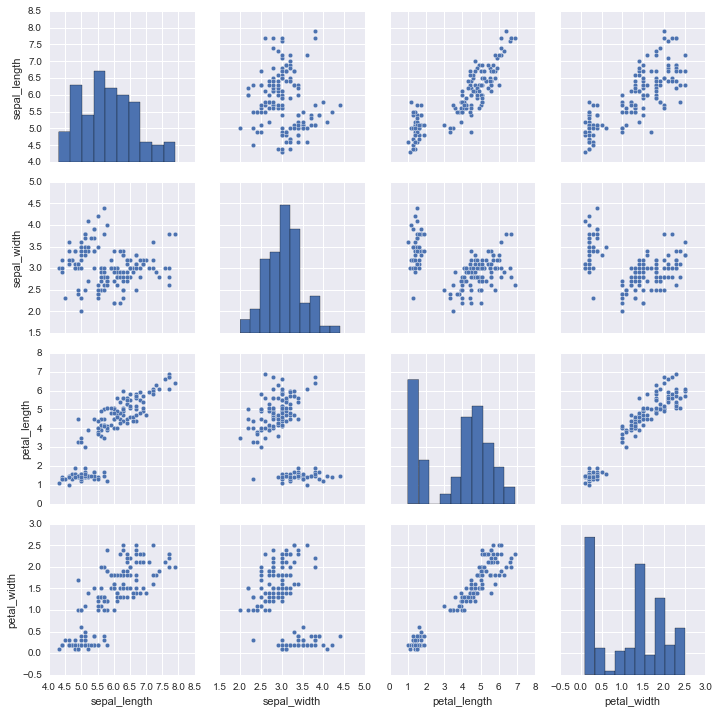

In [6]:
# This special jupyter command causes plots to render in the notebook
%matplotlib inline
sns.pairplot(df)

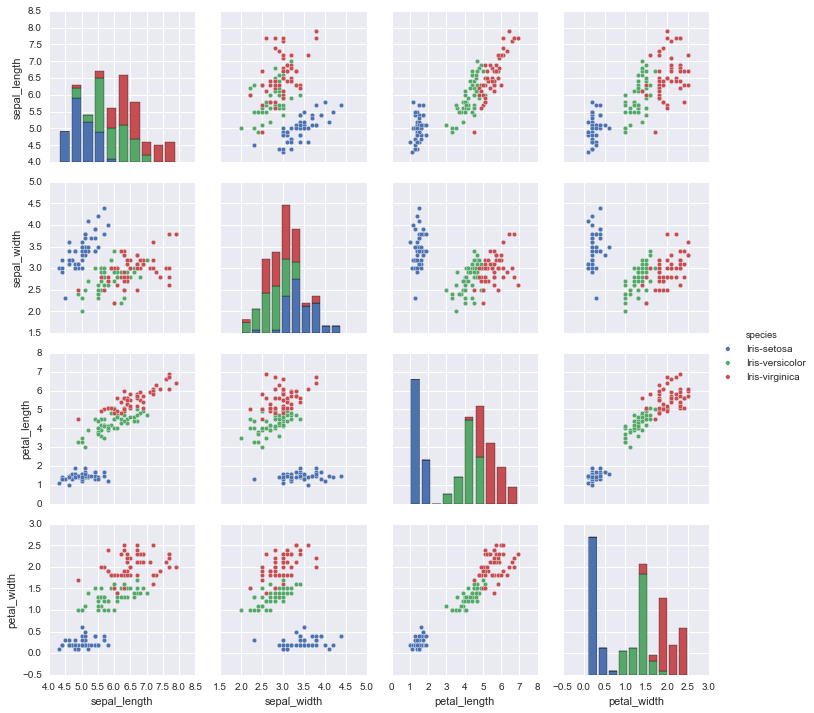

In [7]:
# Seaborn can also color the data by category:
sns.pairplot(df, hue="species")

# Matplotlib

Seaborn makes nice plots but offers less control over the results versus matplotlib (on which seaborn is based). Let's look at the following example.

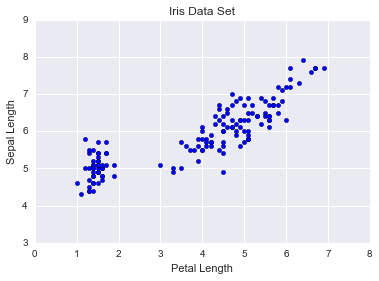

In [8]:
# Make a scatter plot
plt.scatter(df["petal_length"], df["sepal_length"])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.ylim(3, 9)
plt.title("Iris Data Set")
plt.show()

Note that our axes are more nicely labeled when we manually set the names. Matplotlib has a ton of customizability: you can change point shapes and sizes, colors, axes ranges, font sizes, and just about anything else.

We can also invoke matplotlib via pandas directly from the data frame.

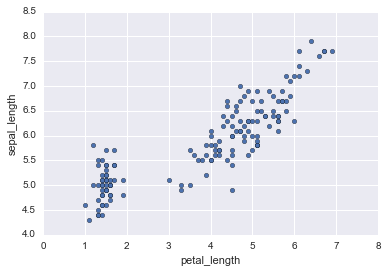

In [9]:
df.plot.scatter("petal_length", "sepal_length")

## Exercise 1
We can make histograms in several ways. Make a histogram of "Sepal Width" from the Iris data set:
* Using matplotlib's `plt.hist`
* Using pandas `df.plot.hist`
* Using seaborn's [distplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)

Seaborn automatically includes a curve fit, which is sometimes not wanted. Look up the keyword argument to turn off the curve fit. Also checkout [this example](https://en.wikipedia.org/wiki/File:Fisher_iris_versicolor_sepalwidth.svg) from wikipedia.

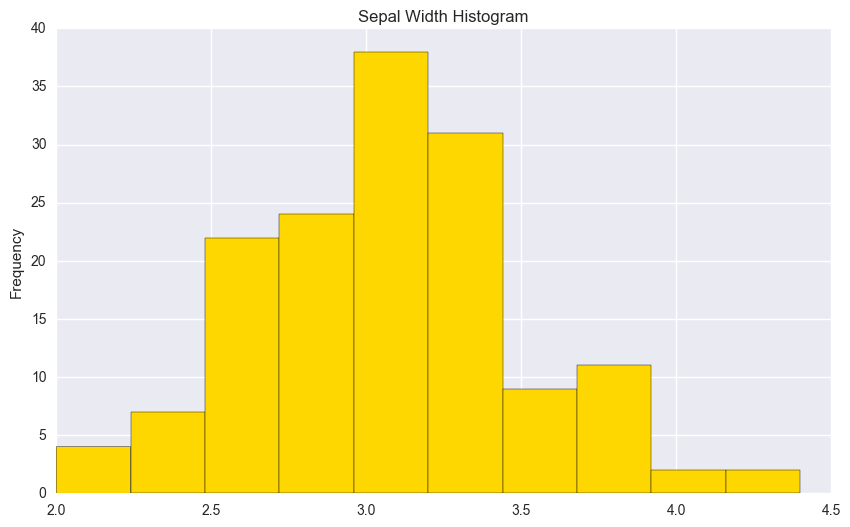

In [24]:
##pandas hit
df.sepal_width.plot(kind = "hist", color = "gold", title = "Sepal Width Histogram")
#df.sepal_width.plot.hist()

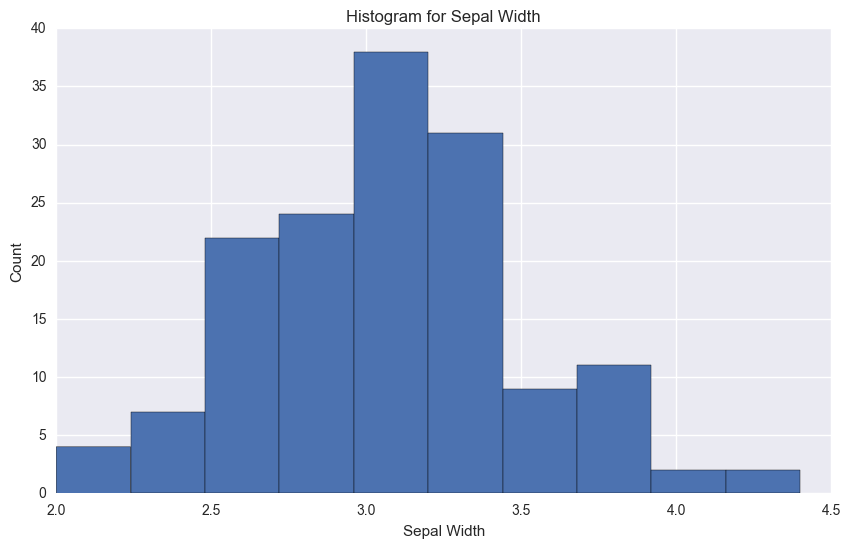

In [20]:
plt.hist(df.sepal_width)
plt.xlabel("Sepal Width")
plt.ylabel("Count")
plt.title("Histogram for Sepal Width")
plt.show()

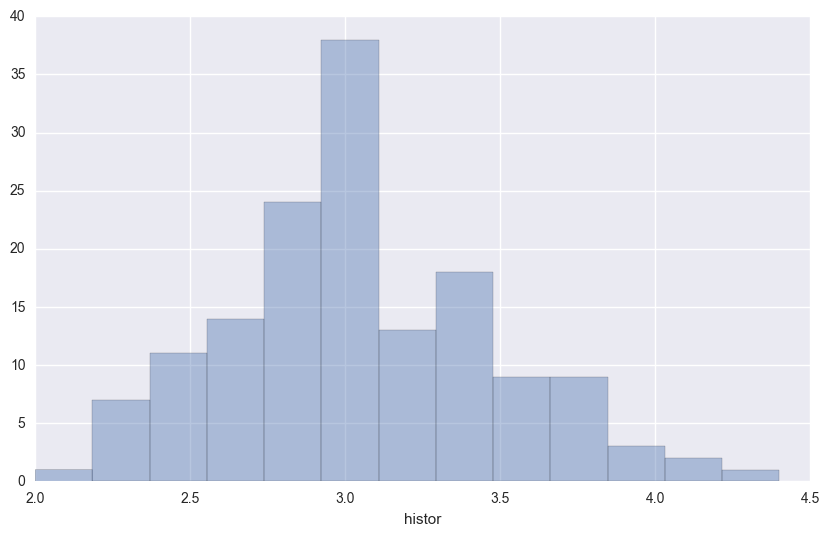

In [39]:
sns.distplot(df.sepal_width, kde=False, axlabel = "histor", label = "Test");

# Categorical Data
Seaborn has some nice functions to plot [categorical data](https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html)

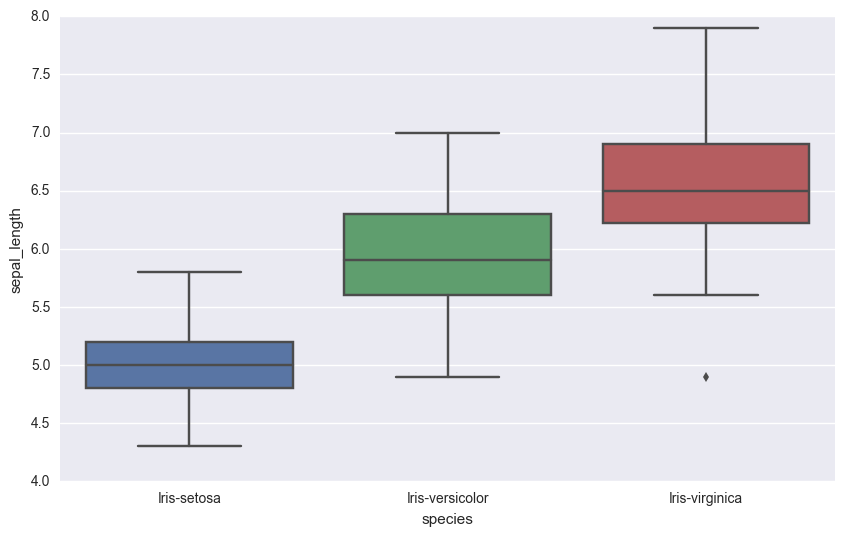

In [19]:
sns.boxplot(x="species", y="sepal_length", data=df)

## Exercise 2

Read the seaborn page on categorical data above and make the following plots:
* sepal_width by category with a boxplot and a swarmplot
* petal_length by category with a violinplot and a swarmplot

# Time Series plots

Matplotlib and Seaborn can make some nice plots associated to time series data. For example, we can make plots of running. The following data contains the monthly price of the ETF VTI (a stock market index fund) over time

In [ ]:
df = pd.read_csv(os.path.join("datasets", "vti.csv"))
df.sort_values(by="Date", inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df.head()

In [ ]:
plt.plot(df["Date"], df["Open"], label="Open")
plt.plot(df["Date"], df["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

In [ ]:
plt.plot(df["Date"], df["Open"] - df["Close"], label="Close-Open")
plt.plot(df["Date"], df["High"] - df["Low"], label="High-Low")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("VTI Monthly Prices")
plt.show()

## Exercise

Make a plot that is composed of two plots, vertically stacked of:
* The closing price
* The volume

You can do this with matplotlib's [gridspec](http://matplotlib.org/users/gridspec.html).

In [ ]:
# Fill in the details
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1) # rows and columns
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax1.plot()
ax2.plot()

You can also use multiple y-axes as follows:

In [ ]:
# Fill in the details, see http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = plt.subplots()
ax1.plot()
ax1.set_ylabel("Closing Price")

ax2 = ax1.twinx()
ax2.plot()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

plt.show()

We can also easily make smoothed curves by computing means over moving windows.

In [ ]:
%matplotlib inline
rolling_mean = df["Open"].rolling(window=10).mean()
plt.plot(range(len(rolling_mean)), rolling_mean)
plt.title("Smoothed VTI Price Data")
plt.show()

Compare to the [visualizations here](http://finviz.com/quote.ashx?t=VTI). You can always put more work into a visualization's aesthetics, so focus on accuracy and proper labelling at first.

## Error bars and filled plots

Often we want to indicate that our data is noisy or contains measurement error. Let's construct a dataset.

In [ ]:
# Check: do you understand this code?
import numpy as np
from scipy import stats
import random
data = []
for i in range(50):
    m = random.randint(5 + i, 15 + i)
    s = random.randint(4, 8)
    dist = stats.norm(m, s)
    draws = dist.rvs(30)
    data.append([np.mean(draws), np.std(draws)])
df = pd.DataFrame(data, columns=["Mean", "Std"])
df.head()

In [ ]:
# Now we can plot with error bars
plt.errorbar(range(len(df)), df["Mean"], yerr=df["Std"])
plt.title("Error Bar Example")

In [ ]:
# Confidence interval: 68%
plt.errorbar(range(len(df)), df["Mean"])
lower = df["Mean"] - df["Std"]
upper = df["Mean"] + df["Std"]
plt.fill_between(range(len(df)), lower, upper, alpha=0.5)
plt.title("CI Example")

## Exercise

* Modify the previous example to a 95% confidence interval (two standard deviations).
* Try to make a similar plot with the Mauna Loa atmospheric carbon data set "co2_mm_mlo.txt"

In [18]:
import pandas as pd
columns = ["year", "month", "decimal_date", "average", "iffrdcgfffffffffffffffffffffnterpolated", "trend", "days"]
# df = pd.read_csv(os.path.join("datasets", "co2_mm_mlo.txt"), comment="#",
#                  delim_whitespace=True, names=columns)
df = pd.read_csv("datasets/co2_mm_mlo.txt", comment="#",
                 delim_whitespace=True, names=columns)
df.head()

,year,month,decimal_date,average,interpolated,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1



## Exercises
For each of the remaining data sets:
* [Abalone Dataset](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all) Various measurements of a type of snail
* [Boston Housing](https://archive.ics.uci.edu/ml/datasets/Housing) Housing prices alone with various supplemental data, such as local crime rates
* [Motor Trend Cars](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
* [Salary Data](https://archive.ics.uci.edu/ml/datasets/Adult)

Work through the following exercises:
* Make a pairplot on a subset of four categories (if possible). Use the vars=["column1", "columnb", ..] to prevent seaborn from making too many plots
* Pick two continuous variables and make a scatter plot with matplotlib, a density plot with seaborn, and a joint plot with seaborn
* If there are any categorical variables, make boxplots and violin plots for each of the categorical variables
* Make at least one plot that has dual-axes or two stacked plots

Feel free to try to make any other plots that might seem interesting! If so please share with the class.


# Exercises

Pick one of the [datasets available here](https://github.com/mwaskom/seaborn-data), such as the exoplanets dataset planets.csv or the diet and exercise data set exercise.csv (or another). Practice the plots you learned above and try to make an awesome plot.

If you need some ideas on different types of plots, checkout:
* The [seaborn gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
* The [matplotlib gallery](http://matplotlib.org/gallery.html)


## Bokeh

Bokeh is another visualization library. There are many [example notebooks](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb) -- pick one and work through it.
